In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb 


In [18]:
def load_data(filepath) :
    return pd.read_csv(filepath, delimiter = ' ',skipinitialspace=True, header=None)
data = load_data('../data/raw/train_FD001.txt')



In [19]:
data = data.dropna(axis=1, how='all')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [9]:
columns = ['Unit number','cycle', 'opst1', 'opst2','opst3'] + [f"sensor{i}" for i in range (1,22)]
print(columns)
data.columns = columns

['Unit number', 'cycle', 'opst1', 'opst2', 'opst3', 'sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21']


In [10]:
data.head()

,Unit number,cycle,opst1,opst2,opst3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [11]:
data.isnull().sum()

Unit number    0
cycle          0
opst1          0
opst2          0
opst3          0
sensor1        0
sensor2        0
sensor3        0
sensor4        0
sensor5        0
sensor6        0
sensor7        0
sensor8        0
sensor9        0
sensor10       0
sensor11       0
sensor12       0
sensor13       0
sensor14       0
sensor15       0
sensor16       0
sensor17       0
sensor18       0
sensor19       0
sensor20       0
sensor21       0
dtype: int64

In [12]:
# On voit qu'aucune colonne ne contient de valeurs nulles
data.duplicated().sum()

np.int64(0)

In [26]:
#pas de doublons

In [13]:
data.describe()

,Unit number,cycle,opst1,opst2,opst3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [ ]:
# Détecter si le dataset contient des outliers : 

for column in data.columns[2:] : 
    min_value = data[column].min()
    max_value = data[column].max()
    print(f"{column}" , '==>> ', 'Min :', min_value, 'Max', max_value) 
    

opst1 ==>>  Min : -0.0087 Max 0.0087
opst2 ==>>  Min : -0.0006 Max 0.0006
opst3 ==>>  Min : 100.0 Max 100.0
sensor1 ==>>  Min : 518.67 Max 518.67
sensor2 ==>>  Min : 641.21 Max 644.53
sensor3 ==>>  Min : 1571.04 Max 1616.91
sensor4 ==>>  Min : 1382.25 Max 1441.49
sensor5 ==>>  Min : 14.62 Max 14.62
sensor6 ==>>  Min : 21.6 Max 21.61
sensor7 ==>>  Min : 549.85 Max 556.06
sensor8 ==>>  Min : 2387.9 Max 2388.56
sensor9 ==>>  Min : 9021.73 Max 9244.59
sensor10 ==>>  Min : 1.3 Max 1.3
sensor11 ==>>  Min : 46.85 Max 48.53
sensor12 ==>>  Min : 518.69 Max 523.38
sensor13 ==>>  Min : 2387.88 Max 2388.56
sensor14 ==>>  Min : 8099.94 Max 8293.72
sensor15 ==>>  Min : 8.3249 Max 8.5848
sensor16 ==>>  Min : 0.03 Max 0.03
sensor17 ==>>  Min : 388 Max 400
sensor18 ==>>  Min : 2388 Max 2388
sensor19 ==>>  Min : 100.0 Max 100.0
sensor20 ==>>  Min : 38.14 Max 39.43
sensor21 ==>>  Min : 22.8942 Max 23.6184


In [14]:
def clean_data(df) :
    colonnes_asupp = ["opst3","sensor1", "sensor5", "sensor6","sensor10", "sensor16", "sensor19", "sensor18"]
    for element in colonnes_asupp :
        df = df.drop(columns=element, axis=1)
    return df

data_cleaned = clean_data(data)    

In [15]:
list = data_cleaned.columns.tolist()
print(list)

['Unit number', 'cycle', 'opst1', 'opst2', 'sensor2', 'sensor3', 'sensor4', 'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor17', 'sensor20', 'sensor21']


In [16]:
display(data_cleaned.head())

,Unit number,cycle,opst1,opst2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


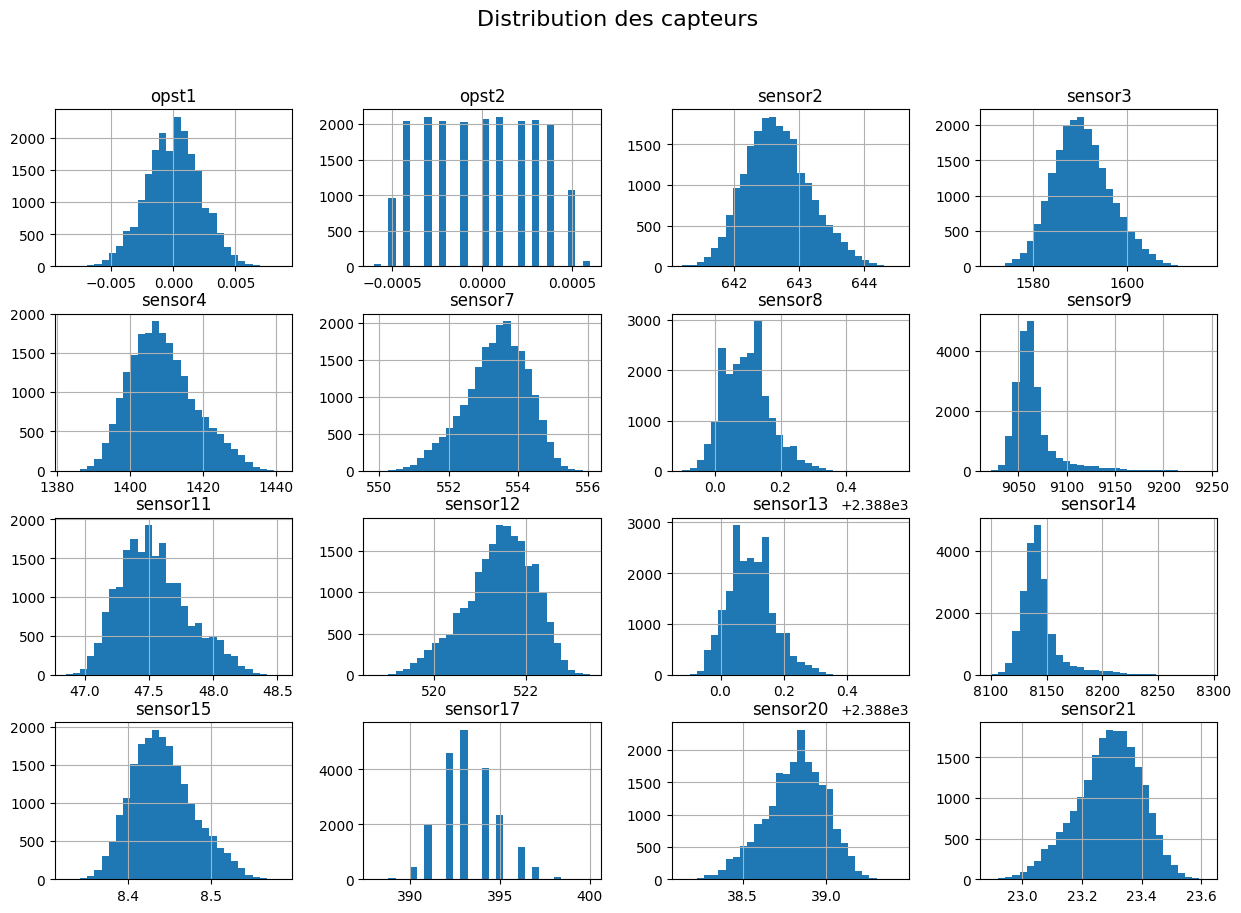

In [30]:
data_cleaned.iloc[:, 2:].hist(figsize=(15,10), bins=30)
plt.suptitle("Distribution des capteurs", fontsize=16)
plt.show()

In [ ]:
# 1- Différence de forme des distributions : 
"""
Si on regarde bien les histogrammes, on peut voir qu'ils ne sont pas tous symétriques 
- Certains capteurs ont une forme en clocje (distribution normal)
- D'autres sont asymétriques, avec un pic décalé à droite ou à gauche
- Certains ont des pics nets avec des valeurs presque identiques (répétées)
"""